In [1]:
# Load Libraries

import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
cd 'E:\SS\AV\GBM Example'

E:\SS\AV\GBM Example


In [4]:
#Load data:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [6]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [7]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

In [8]:
##Check missing:
data.apply(lambda x: sum(x.isnull()))


City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [9]:
#Look at categories of all object variables:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print '\nFrequency count for variable %s'%v
    print data[v].value_counts()



Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

In [10]:
data.head()

,City,DOB,Device_Type,Disbursed,EMI_Loan_Submitted,Employer_Name,Existing_EMI,Filled_Form,Gender,ID,...,Mobile_Verified,Monthly_Income,Processing_Fee,Salary_Account,Source,Var1,Var2,Var4,Var5,source
0,Delhi,23-May-78,Web-browser,0,NaN,CYBOSOL,0,N,Female,ID000002C20,...,N,20000,NaN,HDFC Bank,S122,HBXX,G,1,0,train
1,Mumbai,07-Oct-85,Web-browser,0,6762.9,TATA CONSULTANCY SERVICES LTD (TCS),0,N,Male,ID000004E40,...,Y,35000,NaN,ICICI Bank,S122,HBXA,G,3,13,train
2,Panchkula,10-Oct-81,Web-browser,0,NaN,ALCHEMIST HOSPITALS LTD,0,N,Male,ID000007H20,...,Y,22500,NaN,State Bank of India,S143,HBXX,B,1,0,train
3,Saharsa,30-Nov-87,Web-browser,0,NaN,BIHAR GOVERNMENT,0,N,Male,ID000008I30,...,Y,35000,NaN,State Bank of India,S143,HBXX,B,3,10,train
4,Bengaluru,17-Feb-84,Web-browser,0,NaN,GLOBAL EDGE SOFTWARE,25000,N,Male,ID000009J40,...,Y,100000,NaN,HDFC Bank,S134,HBXX,B,3,17,train


### Handle Individual Variables:
#### City Variable:


In [11]:
len(data['City'].unique())
#drop city because too many unique
data.drop('City',axis=1,inplace=True)


In [12]:
## Determine Age from DOB
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [35]:
#Create age variable:
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()


0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [63]:
#p=[]
#for i in np.array(data['DOB']):
#    p.append(i[-2:])
#p[0:9]    

In [64]:
#drop DOB:
data.drop('DOB',axis=1,inplace=True)


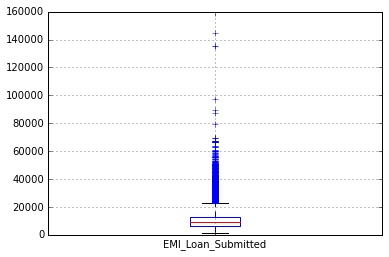

In [65]:
#EMI_Load_Submitted
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')


In [66]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)


,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [67]:
#drop original vaiables:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)


In [68]:
##Employer Name
len(data['Employer_Name'].value_counts())


57193

In [69]:
#I'll drop the variable because too many unique values. Another option could be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

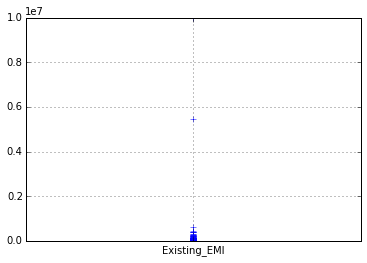

In [70]:
## Existing EMI
data.boxplot(column='Existing_EMI',return_type='axes')


In [71]:
data['Existing_EMI'].describe()

count      124626.000000
mean         3636.342492
std         33691.240042
min             0.000000
25%             0.000000
50%             0.000000
75%          3500.000000
max      10000000.000000
Name: Existing_EMI, dtype: float64

In [72]:
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)

In [74]:
# Interest Rate:
# Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
5,13.99,0
6,NaN,1
7,NaN,1
8,14.85,0
9,18.25,0


In [75]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [76]:
#Lead Creation Date:
#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)


In [78]:
#Loan Amount and Tenure applied:
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [79]:
# Loan Amount and Tenure submitted
#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)


In [80]:
#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)


In [81]:
# Remove logged-in
data.drop('LoggedIn',axis=1,inplace=True)


In [82]:
#Remove salary account
#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)


In [83]:
#Processing_Fee
#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

In [84]:
## Source
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()


S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [85]:
## Final Data:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [86]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [87]:
## Numerical Coding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])


In [88]:
#One-Hot Coding

data = pd.get_dummies(data, columns=var_to_encode)
data.columns


Index([u'Disbursed', u'Existing_EMI', u'ID', u'Loan_Amount_Applied',
       u'Loan_Tenure_Applied', u'Monthly_Income', u'Var4', u'Var5', u'source',
       u'Age', u'EMI_Loan_Submitted_Missing', u'Interest_Rate_Missing',
       u'Loan_Amount_Submitted_Missing', u'Loan_Tenure_Submitted_Missing',
       u'Processing_Fee_Missing', u'Device_Type_0', u'Device_Type_1',
       u'Filled_Form_0', u'Filled_Form_1', u'Gender_0', u'Gender_1', u'Var1_0',
       u'Var1_1', u'Var1_2', u'Var1_3', u'Var1_4', u'Var1_5', u'Var1_6',
       u'Var1_7', u'Var1_8', u'Var1_9', u'Var1_10', u'Var1_11', u'Var1_12',
       u'Var1_13', u'Var1_14', u'Var1_15', u'Var1_16', u'Var1_17', u'Var1_18',
       u'Var2_0', u'Var2_1', u'Var2_2', u'Var2_3', u'Var2_4', u'Var2_5',
       u'Var2_6', u'Mobile_Verified_0', u'Mobile_Verified_1', u'Source_0',
       u'Source_1', u'Source_2'],
      dtype='object')

In [89]:
#Separate train & test:
train1 = data.loc[data['source']=='train']
test1 = data.loc[data['source']=='test']


In [90]:
train1.drop('source',axis=1,inplace=True)
test1.drop(['source','Disbursed'],axis=1,inplace=True)


C:\Users\paushali\Anaconda\envs\dato-env\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\paushali\Anaconda\envs\dato-env\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [91]:
train1.to_csv('train_modified.csv',index=False)
test1.to_csv('test_modified.csv',index=False)


### GBM Discussion

In [93]:
# The matplotlibrc file
# matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which we call rc settings or 
# rc parameters. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color 
#and style, axes, axis and grid properties, text and font properties and so on. #figure.figsize: 8, 6  # figure size in inches
## Import Libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


#### Load Data:
The data has gone through following pre-processing:
1.	City variable dropped because of too many categories
2.	DOB converted to Age | DOB dropped
3.	EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | EMI_Loan_Submitted dropped
4.	EmployerName dropped because of too many categories
5.	Existing_EMI imputed with 0 (median) - 111 values were missing
6.	Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Interest_Rate dropped
7.	Lead_Creation_Date dropped because made little intuitive impact on outcome
8.	Loan_Amount_Applied, Loan_Tenure_Applied imputed with missing
9.	Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Loan_Amount_Submitted dropped
10.	Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Loan_Tenure_Submitted dropped
11.	LoggedIn, Salary_Account removed
12.	Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Processing_Fee dropped
13.	Source - top 2 kept as is and all others combined into different category
14.	Numerical and One-Hot-Coding performed


In [94]:
train = pd.read_csv('train_modified.csv')

In [95]:
target='Disbursed'
IDcol = 'ID'

In [96]:
train['Disbursed'].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

### Define a function for modeling and cross-validation
This function will do the following:
1.	fit the model
2.	determine training accuracy
3.	determine training AUC
4.	determine testing AUC
5.	perform CV if performCV is True
6.	plot Feature Importance if printFeatureImportance is True


In [98]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


### Baseline Model
Since here the criteria is AUC, simply predicting the most prominent class would give an AUC of 0.5 always. 
Another way of getting a baseline model is to use the algorithm without tuning, i.e. with default parameters.



Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.8318565 | Std - 0.008760341 | Min - 0.820805 | Max - 0.8438499


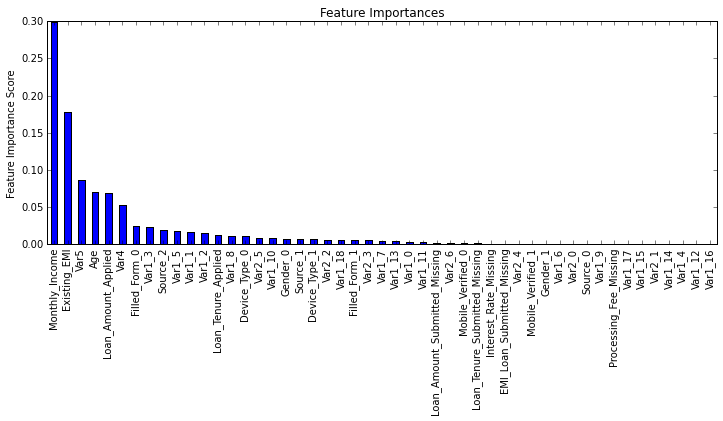

In [100]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, test, predictors)


### GBM Models:
There 2 types of parameters here:
1.	Tree-specific parameters
•	min_samples_split
•	min_samples_leaf
•	max_depth
•	min_leaf_nodes
•	max_features
•	loss function
2.	Boosting specific paramters
•	n_estimators
•	learning_rate
•	subsample

### Approach for tackling the problem
1.	Decide a relatively higher value for learning rate and tune the number of estimators requried for that.
2.	Tune the tree specific parameters for that learning rate
3.	Tune subsample
4.	Lower learning rate as much as possible computationally and increase the number of estimators accordingly.


#### Step 1- Find the number of estimators for a high learning rate
We will use the following benchmarks for parameters:
1.	min_samples_split = 500 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value
2.	min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later.
3.	max_depth = 8 : since high number of observations and predictors, choose relatively high value
4.	max_features = 'sqrt' : general thumbrule to start with
5.	subsample = 0.8 : typically used value (will be tuned later)
0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.


In [104]:
#range(20,81,10)
#[20, 30, 40, 50, 60, 70, 80]
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [105]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83296, std: 0.01067, params: {'n_estimators': 20},
  mean: 0.83574, std: 0.00943, params: {'n_estimators': 30},
  mean: 0.83679, std: 0.00936, params: {'n_estimators': 40},
  mean: 0.83778, std: 0.00953, params: {'n_estimators': 50},
  mean: 0.83761, std: 0.00925, params: {'n_estimators': 60},
  mean: 0.83814, std: 0.00967, params: {'n_estimators': 70},
  mean: 0.83734, std: 0.00937, params: {'n_estimators': 80}],
 {'n_estimators': 70},
 0.83814477201532223)

So we got 70 as the optimal estimators for the 0.1 learning rate. Note that 70 is a reasonable value and can be used as it is. 
But it might not be the same in all cases. Other situations:
1.	If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
2.	If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate


### Step 2- Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:
1.	Tune max_depth and num_samples_split
2.	Tune min_samples_leaf
3.	Tune max_features


In [112]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'min_samples_split': [200, 400, 600, 800, 1000], 'max_depth': [5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [113]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83361, std: 0.01212, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.83383, std: 0.01320, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.83592, std: 0.01350, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.83559, std: 0.01237, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.83456, std: 0.01185, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.83634, std: 0.00696, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.83723, std: 0.00767, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.83668, std: 0.00962, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.83712, std: 0.00974, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.83851, std: 0.01038, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.83139, std: 0.01045, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.83747, std: 0.00949, params: {'min_samples_split': 400, 'max_depth': 9},
  

Since we reached the maximum of min_sales_split, we should check higher values as well. 
Also, we can tune min_samples_leaf with it now as max_depth is fixed. One might argue that max depth might change 
for higher value but if you observe the output closely, a max_depth of 9 had a better model for most of cases. 
So lets perform a grid search on them:

In [114]:
#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=7,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [115]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83857, std: 0.01063, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.83876, std: 0.01128, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.83727, std: 0.01055, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.83995, std: 0.01018, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.83826, std: 0.01181, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.83830, std: 0.01091, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.83958, std: 0.00919, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.83817, std: 0.01085, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.83829, std: 0.01281, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.83883, std: 0.01040, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.83788, std: 0.01139, params: {'min_samples_split': 1800, 'min_samples_

In [116]:
gsearch3.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=60, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              random_state=10, subsample=0.8, verbose=0, warm_start=False)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.885168
CV Score : Mean - 0.8401157 | Std - 0.01090062 | Min - 0.8256361 | Max - 0.8528209


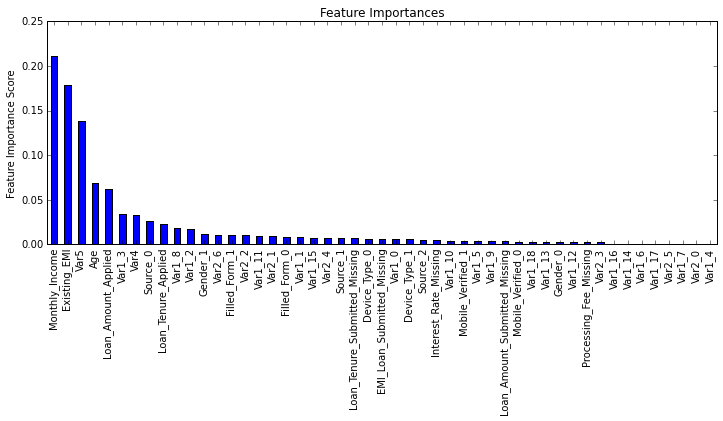

In [117]:
modelfit(gsearch3.best_estimator_, train, test, predictors)

In [118]:
#Tune max_features:

#Grid seach on subsample and max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=7, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=60, min_samples_split=1200,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'max_features': [7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [119]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83768, std: 0.01229, params: {'max_features': 7},
  mean: 0.83762, std: 0.01174, params: {'max_features': 9},
  mean: 0.84071, std: 0.00788, params: {'max_features': 11},
  mean: 0.83816, std: 0.01020, params: {'max_features': 13},
  mean: 0.83882, std: 0.01058, params: {'max_features': 15},
  mean: 0.83647, std: 0.00965, params: {'max_features': 17},
  mean: 0.83428, std: 0.01044, params: {'max_features': 19}],
 {'max_features': 11},
 0.84071372374133557)

In [120]:
### Step3- Tune Subsample and Lower Learning Rate

In [121]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=7, 
                            min_samples_split=1000, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=11),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features=11, max_leaf_nodes=None,
              min_samples_leaf=60, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [122]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83517, std: 0.00956, params: {'subsample': 0.6},
  mean: 0.83918, std: 0.01107, params: {'subsample': 0.7},
  mean: 0.83753, std: 0.00935, params: {'subsample': 0.75},
  mean: 0.83648, std: 0.01026, params: {'subsample': 0.8},
  mean: 0.83776, std: 0.00881, params: {'subsample': 0.85},
  mean: 0.83966, std: 0.00870, params: {'subsample': 0.9}],
 {'subsample': 0.9},
 0.83966473213150028)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.887752
CV Score : Mean - 0.8396698 | Std - 0.01144432 | Min - 0.8268059 | Max - 0.8533296


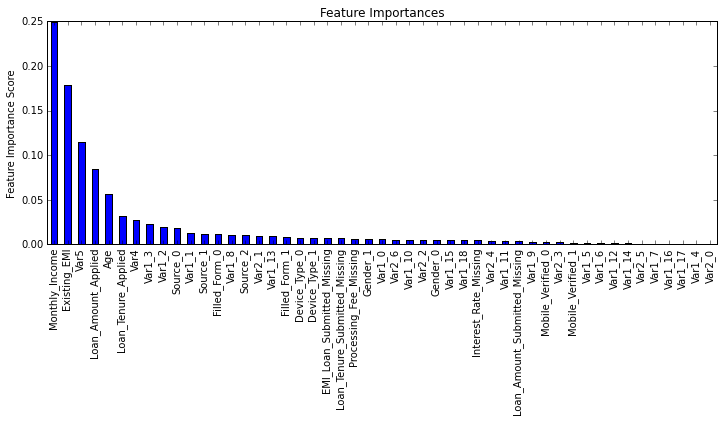

In [123]:
#  With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get
#  more robust results:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=7, min_samples_split=1000, 
                                         min_samples_leaf=60, subsample=0.9, random_state=10, max_features=11)
modelfit(gbm_tuned_1, train, test, predictors)



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.890648
CV Score : Mean - 0.8404079 | Std - 0.009555258 | Min - 0.8283647 | Max - 0.8514279


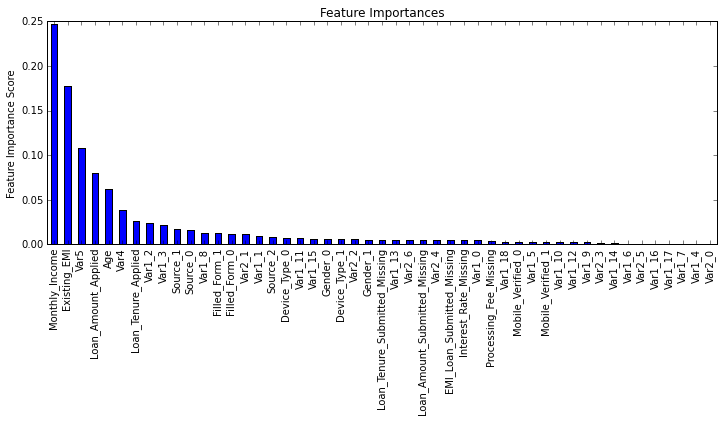

In [124]:
# 1/10th learning rate
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=1000, 
                                         min_samples_leaf=60, subsample=0.9, random_state=10, max_features=11)
modelfit(gbm_tuned_2, train, test, predictors)



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.887661


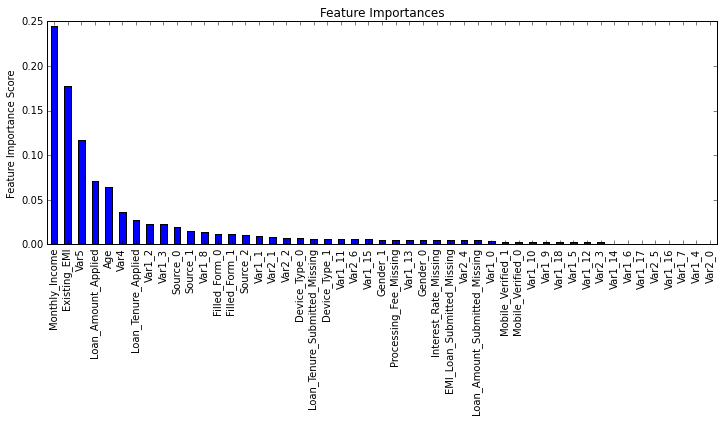

In [126]:
# 1/50th learning rate
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1000,max_depth=7, min_samples_split=1000, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=11,
                                         warm_start=True)
modelfit(gbm_tuned_3, train, test, predictors, performCV=False)



Model Report
Accuracy : 0.9854
AUC Score (Train): 0.895887


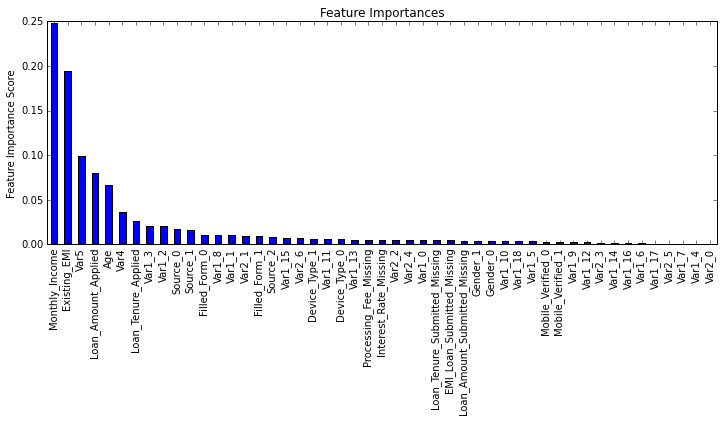

In [130]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=7, min_samples_split=1000, 
                                         min_samples_leaf=60, subsample=0.90, random_state=10, max_features=11,
                                         warm_start=True)
modelfit(gbm_tuned_4, train, test, predictors, performCV=False)
